### (0 баллов) Считываем данные

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from seaborn import heatmap
from numpy.random import random, randint
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.datasets import load_boston

dataset = load_boston()
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Каждая квартира имеет 13 признаков:

In [ ]:
X = dataset['data']
X[:10]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00],
       [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.4300e+00, 5.8700e

In [ ]:
dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Хочется научиться предсказывать функцию цены квартиры. Предположительно, она зависит как-то от этих признаков.

In [ ]:
y = dataset['target']
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

### (1 балл) Разделите данные на тренировочную и тестовую части.

Тестовая часть должна составлять 10% выборки.


In [ ]:
# Сначала не совсем по заданию
# Для начала все данные добавлю в Pandas-таблицу
df = pd.DataFrame(X, columns=dataset['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# Размеры признакового пространства
df.shape

(506, 13)

In [ ]:
# Посмотрим на распределение признаков
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [ ]:
# Пропусков нет, есть явные выбросы в некоторых колонках

In [ ]:
# Вот теперь по заданию
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.1, random_state = 42)

In [ ]:
# Посмотрим на размеры
X_test.shape

(51, 13)

### (1 балл) Обучение и применение модели
Обучите модель линейной регрессии на тренировочной части и предскажите результаты на тестовой части.



In [ ]:
LR = LinearRegression()
LR.fit(X_train, y_train)
pred = LR.predict(X_test)

### (2 балл) Валидация результата

Напишите свою функцию MSE, убедитесь, что она совпадает с реализацией из sklearn и посчитайте своей результат на тестовой части.

In [ ]:
from sklearn.metrics import mean_squared_error
def MSE(y_real, y_pred):
    return np.mean((y_real - y_pred)**2)

In [ ]:
# Сначала протестируем на классах эквивалентости:
# 1. Оба массива совпадают, соответственно, ответ должен быть 0
# 2. Оба массива отличаются от друг друга на 1 во всех строках
# 3. Оба массива состоят из целых чисел, но распределение случайное
# 4. Оба массива состоят из случайных дробных чисел в диапазоне [-10:10]

EPS = 1e-10

def check_MSE(my_value : float, sklearn_value : float) -> bool:
  if np.abs(my_value - sklearn_value) <= EPS:
    print("Тест пройден!")
    return True
  else:
    print("Тест не пройден!:(")
    return False 

In [ ]:
y_pred = np.ones(shape = (100, 1))
y_real = np.ones(shape = (100, 1))

check_MSE(MSE(y_real, y_pred), mean_squared_error(y_real, y_pred))

Тест пройден!


True

In [ ]:
y_pred = np.zeros(shape = (100, 1))
y_real = np.ones(shape = (100, 1))

check_MSE(MSE(y_real, y_pred), mean_squared_error(y_real, y_pred))

Тест пройден!


True

In [ ]:
y_pred = randint(low = -10, high = 10, size = (100, 1))
y_real = randint(low = -10, high = 10, size = (100, 1))

check_MSE(MSE(y_real, y_pred), mean_squared_error(y_real, y_pred))

Тест пройден!


True

In [ ]:
y_pred = random(size = (100, 1)) * 20 - 10
y_real = random(size = (100, 1)) * 20 - 10

check_MSE(MSE(y_real, y_pred), mean_squared_error(y_real, y_pred))

Тест пройден!


True

In [ ]:
# Теперь, убедившись, что моя реализация совпадает со Sklearn, можно подсчитать результат
MSE(y_test, pred)

14.99585287658254

Насколько хорошо вы предсказали цену? Сравните с наивным алгоритмом (предсказать среднюю цену на тренировочной части вне зависимости от признаков).

In [ ]:
# Наивный алгоритм - сделать прогноз в виде просто среднего для всего train 
MSE(y_test, np.mean(y_train))

65.00802631111615

In [ ]:
# Линейная регрессия позволила улучшить результат наивного алгоритма на test в 4 раза

### (2 балла) Улучшите результат.

Возможно, происходит переобучение, попробуйте применить регуляризацию, чтобы улучшить результат (то есть используйте Ridge вместо LinearRegression).

Нарисуйте график зависимости MSE от коэффициента регуляризации.

In [ ]:
# Сразу пробуем Ridge и смотрим, какой минимальный результат получится

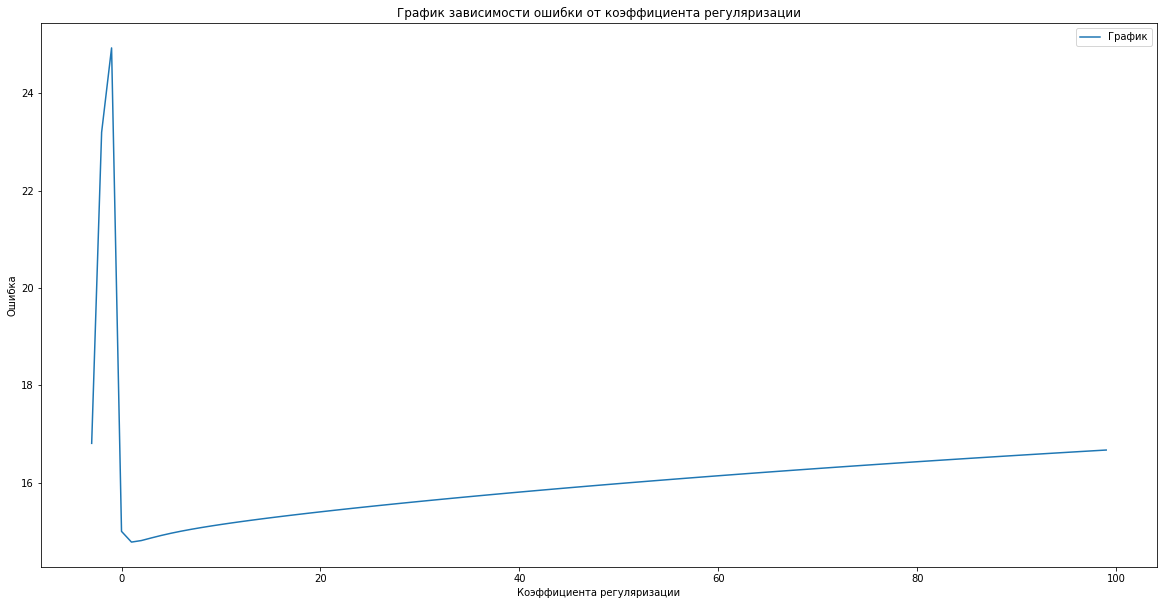

Лучшее значение - 1.0, ошибка на CV - 14.775452511215317


In [ ]:
lambdas = np.arange(-3, 100.0, 1)

# Лямбды и их ошибки на обучающей выборке
lambda_errors = []

# Проходим по всем лямбдам и записываем ошибки на обучающей выборке
for val in lambdas:
    reg = Ridge(alpha=val).fit(X_train, y_train)
    lambda_errors.append(MSE(reg.predict(X_test), y_test))

plt.figure(figsize=(20, 10))
plt.plot(lambdas, lambda_errors, label = "График")
plt.title("График зависимости ошибки от коэффициента регуляризации")
plt.xlabel("Коэффициента регуляризации")
plt.ylabel("Ошибка")
plt.legend()
plt.show()

min_val, min_train_error = lambdas[lambda_errors.index(min(lambda_errors))], min(lambda_errors)

print("Лучшее значение - {}, ошибка на CV - {}".format(min_val, min_train_error))

In [ ]:
# Получили для Ridge лучший результат 14.77 при alpha = 1
R = Ridge(alpha = 1)
R.fit(X_train, y_train)
MSE(R.predict(X_test), y_test)

14.775452511215317

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5172.801760145703, tolerance: 3.941411626373626
  positive)


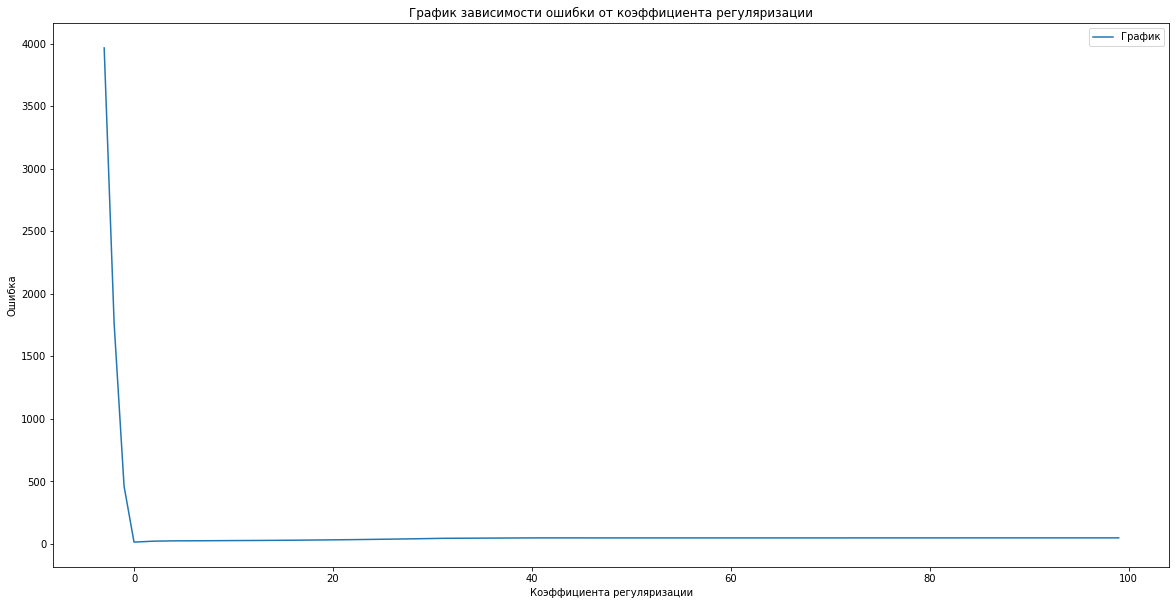

Лучшее значение - 0.0, ошибка на CV - 14.995852876582637


In [ ]:
# Проделаем тоже самое для Lasso

# Лямбды и их ошибки на обучающей выборке
lambda_errors = []

# Проходим по всем лямбдам и записываем ошибки на обучающей выборке
for val in lambdas:
    reg = Lasso(alpha=val).fit(X_train, y_train)
    lambda_errors.append(MSE(reg.predict(X_test), y_test))

plt.figure(figsize=(20, 10))
plt.plot(lambdas, lambda_errors, label = "График")
plt.title("График зависимости ошибки от коэффициента регуляризации")
plt.xlabel("Коэффициента регуляризации")
plt.ylabel("Ошибка")
plt.legend()
plt.show()

min_val, min_train_error = lambdas[lambda_errors.index(min(lambda_errors))], min(lambda_errors)

print("Лучшее значение - {}, ошибка на CV - {}".format(min_val, min_train_error))

In [ ]:
# Как видно, Lasso здесь не подходит

Помогает ли регуляризация? Какой коэффициент регуляризации надо выбрать, чтобы ошибка была минимальной? Чему при этом равна ошибка? Напишите выводы о проведенных экспериментах

In [ ]:
# Посмотрим на признаки:
# 1. CRIM      Уровень преступности на душу населения по городу
# 2. ZN        Доля земли под жилую застройку зонирована на участки площадью более 25 000 кв. Футов.
# 3. INDUS     Доля акров, не относящихся к розничной торговле, на город
# 4. CHAS      Ограничена ли рекой
# 5. NOX       Концентрация оксидов азота
# 6. RM        Среднее количество комнат в доме
# 7. AGE       Доля единиц, занимаемых домами, построенных до 1940 г.
# 8. DIS       Взвешенные расстояния до пяти бостонских центров занятости
# 9. RAD       Индекс доступности радиальных автомобильных дорог
# 10. TAX      Ставка налога на имущество в размере полной стоимости за 10 000 долларов США.
# 11. PTRATIO  Соотношение учеников и учителей
# 12. B        Доля негров (BLACK LIVES MATTER!!!!!!!!!!!!!!)
# 13. LSTAT    Доля бедного населения

In [ ]:
# Посмотрим распределение признаков и таргета

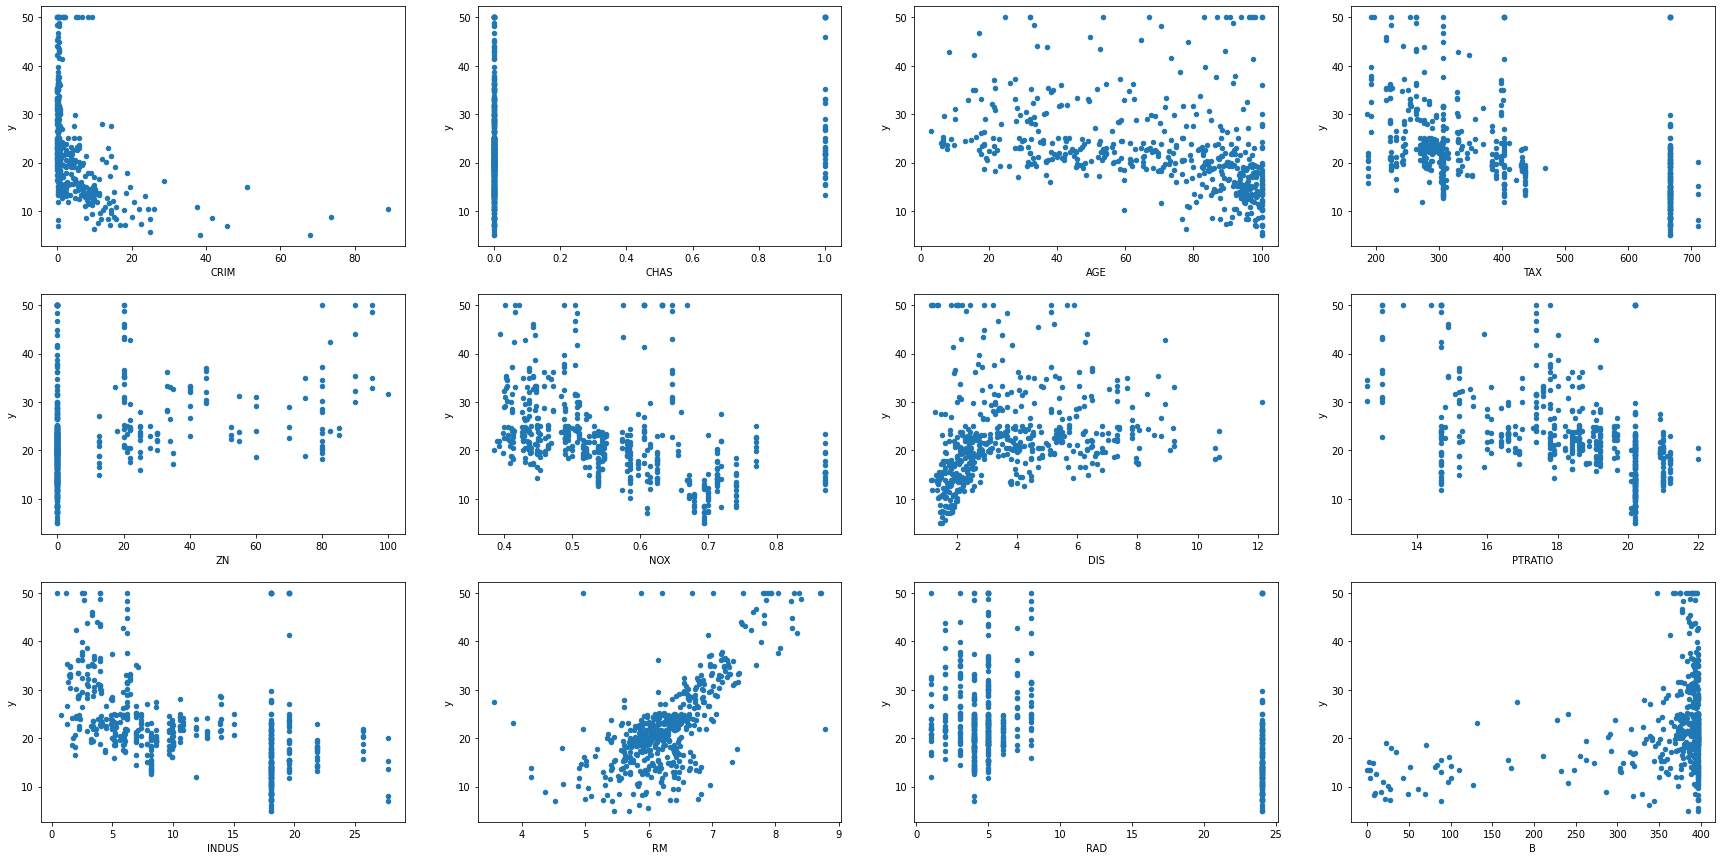

In [ ]:
N = df.columns.shape[0] - 1
fig, axs = plt.subplots(3, N // 3)
df['y'] = y
for i in range(N):
  col = df.columns[i]
  df.plot(kind='scatter', x=col, y='y', ax=axs[i % 3, i // 3], figsize=(30, 15))

df = df.drop(['y'], axis = 1)
plt.show()

In [ ]:
# Картина не впечатляет.
# Чёткая линейная зависимость просматривается в RM, LSTAT, с натяжкой DIS и AGE
# Остальное трудно описать как-то линейно

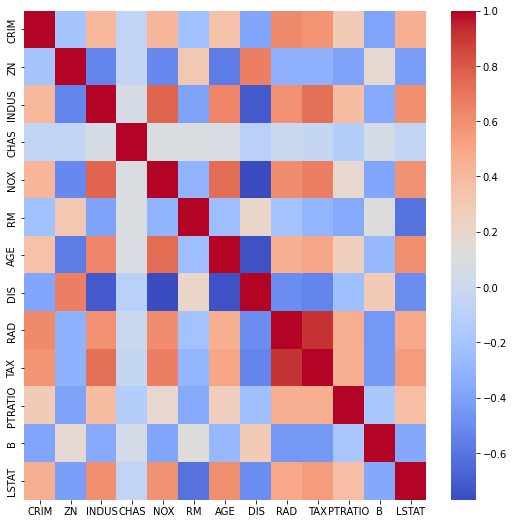

In [ ]:
# Посмотрим на корреляцию признаков
corr = df.corr()

plt.figure(figsize = (9, 9))
heatmap(corr, cmap = 'coolwarm')
plt.show()

In [ ]:
# Заметно, что высокая коррелляция между TAX и RAD
# Также с несколькими признаками по модулю высокая корреляция у DIS 

# Корреляция между чёрными и преступностью не очень большая, шах и мат хейтеры, Black Lives Matter!

In [ ]:
# Теперь посмотрим, есть ли категориальные признаки
for el in df.columns:
  print("Для признака {} количество значений {}".format(el, df[el].value_counts().shape[0]))

Для признака CRIM количество значений 504
Для признака ZN количество значений 26
Для признака INDUS количество значений 76
Для признака CHAS количество значений 2
Для признака NOX количество значений 81
Для признака RM количество значений 446
Для признака AGE количество значений 356
Для признака DIS количество значений 412
Для признака RAD количество значений 9
Для признака TAX количество значений 66
Для признака PTRATIO количество значений 46
Для признака B количество значений 357
Для признака LSTAT количество значений 455


In [ ]:
# Два категориальных признака: RAD и CHAS
# Так как CHAS и так приведен к корректному виду (принимает только 1 и 0), то надо добавить только RAD

# Но в распределении RAD видно, что у одного положительного значения таргет ниже, чем у отрицательных
# Учтём это при составлении нового признака
df['RAD-T'] = (df['RAD'] > 10).astype(int) * 1

# В INDUS тоже есть такой прикол, что у правой части значения маленькие, так что добавляю признак
df['INDUS-T'] = (df['INDUS'] > 16).astype(int) * 1

In [ ]:
# Сначала применим StandartScaler для непрерывных признаков

scaler = StandardScaler()

for col in df.columns:
  df[col] = np.array(scaler.fit_transform(pd.DataFrame(df[col])))

In [ ]:
# Подсчитаем классическую метрику, по которой считали вначале
# Перед этим удалим признаки, которые только увеличивают ошибку

X_train, X_test, y_train, y_test = train_test_split(df.drop(['LSTAT', 'NOX', 'CRIM', 'TAX'], axis = 1), y, test_size = 0.1, random_state = 42)

R = Ridge(alpha = 1)
R.fit(X_train, y_train)
MSE(R.predict(X_test), y_test)

12.647588900999304

In [ ]:
# Выводы
# 1. L2-регуляризация действительно помогла немного улучшить результат. От L1 толка здесь не было
# 2. Ввод нового признака помог чуть улучшить результат
# 3. Для получения лучшего результата пришлось удалить четыре столбца.
# TAX и так высоко коррелировал с другим признаком, а NOX пока что не влияет на стоимость.
# Для CRIM и LSTAT склонен считать, что дело скорее просто в таких данных.

# Получился лучший результат 12.82 для метрики MSE с train-test.